In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
a=pd.read_csv('C:/Users/SRIDHAR/Downloads//monthly-beer-production-in-austr.csv')
a

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [23]:
a['Month']=pd.to_datetime(a['Month'])

In [24]:
a.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

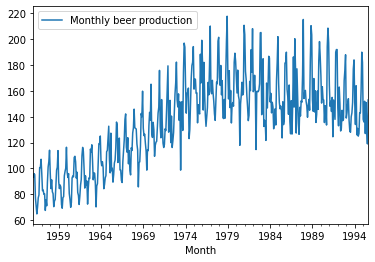

In [25]:
a.plot()

In [26]:
from statsmodels.tsa.stattools import adfuller
adfuller(a['Monthly beer production'])

(-2.282661418787574,
 0.1776209982913261,
 17,
 458,
 {'1%': -3.4447087976702284,
  '5%': -2.867871300049488,
  '10%': -2.5701423432047443},
 3463.9034375936567)

In [27]:
def method_check (time_series):
    result=adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    Labels=('ADF test stastic','p-value','#lags','no of obs')
    for value,label in zip(result,Labels):
        print(label,':',str(value))
    if result[1]<=0.05:
        print('strong evidence against null hypothesis and my test series is stationary')
    else:
          print('weak evidence against null hypothesis and my test series is not stationary')
    

In [28]:
method_check(a['Monthly beer production'])

Augmented Dickey Fuller Test
ADF test stastic : -2.282661418787574
p-value : 0.1776209982913261
#lags : 17
no of obs : 458
weak evidence against null hypothesis and my test series is not stationary


In [29]:
a['Monthly beer production 1st diff']=a['Monthly beer production']-a['Monthly beer production'].shift(1)
method_check(a['Monthly beer production 1st diff'].dropna())

Augmented Dickey Fuller Test
ADF test stastic : -4.980663743064742
p-value : 2.4234117859966367e-05
#lags : 18
no of obs : 456
strong evidence against null hypothesis and my test series is stationary


In [30]:
a["Monthly beer production 1st seasonal diff"]=a['Monthly beer production 1st diff']-a['Monthly beer production 1st diff'].shift(12)

In [31]:
method_check(a["Monthly beer production 1st seasonal diff"].dropna())

Augmented Dickey Fuller Test
ADF test stastic : -8.633215979187813
p-value : 5.6813391055622395e-14
#lags : 16
no of obs : 446
strong evidence against null hypothesis and my test series is stationary


In [32]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

C:\Users\SRIDHAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


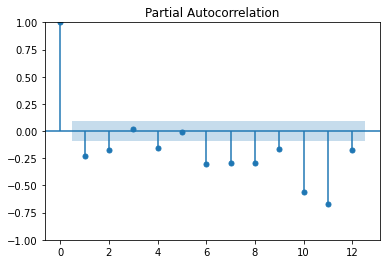

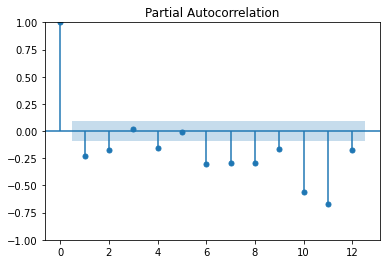

In [33]:
plot_pacf(a['Monthly beer production 1st diff'].dropna(),lags=12)

C:\Users\SRIDHAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


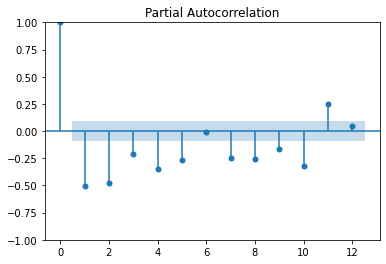

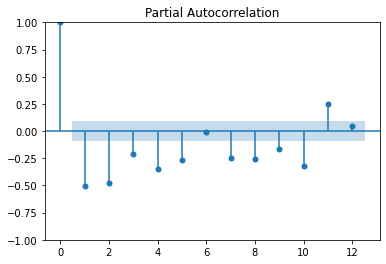

In [34]:
plot_pacf(a["Monthly beer production 1st seasonal diff"].dropna(),lags=12)

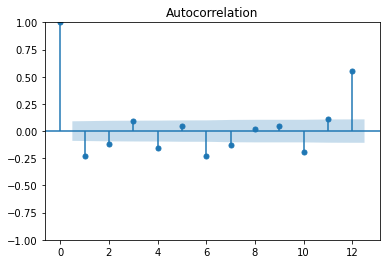

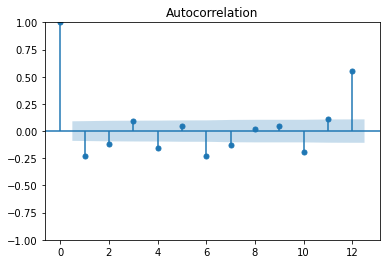

In [35]:
plot_acf(a['Monthly beer production 1st diff'].dropna(),lags=12)

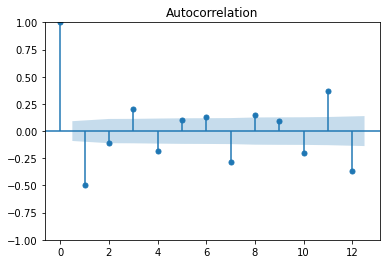

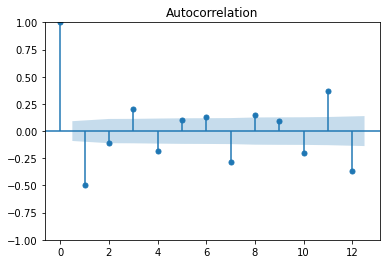

In [36]:
plot_acf(a["Monthly beer production 1st seasonal diff"].dropna(),lags=12)

In [37]:
#d=1,D=1,p=0,P=0,q=0,Q=0

In [38]:

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [39]:
b=sm.tsa.statespace.SARIMAX (a['Monthly beer production'],order=(1,0,0),seasonal_order=(1,0,0,12))
result=b.fit()
print(result.summary())

C:\Users\SRIDHAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SRIDHAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SRIDHAR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:            Monthly beer production   No. Observations:                  476
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -2000.904
Date:                            Wed, 14 Sep 2022   AIC                           4007.808
Time:                                    07:59:15   BIC                           4020.304
Sample:                                01-01-1956   HQIC                          4012.721
                                     - 08-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9612      0.013     76.256      0.000       0.936       0.986
ar.S.L12       0.5956      0.035   

<AxesSubplot:xlabel='Month'>

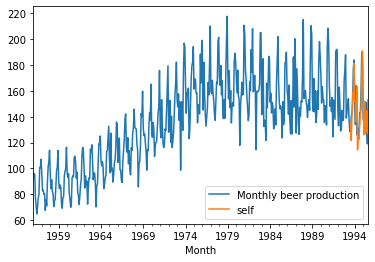

In [40]:
a['self']=result.predict(start=450,end=476)
a[['Monthly beer production','self']].plot()

In [41]:
a

,Monthly beer production,Monthly beer production 1st diff,Monthly beer production 1st seasonal diff,self
Month,,,,
1956-01-01,93.2,NaN,NaN,NaN
1956-02-01,96.0,2.8,NaN,NaN
1956-03-01,95.2,-0.8,NaN,NaN
1956-04-01,77.1,-18.1,NaN,NaN
1956-05-01,70.9,-6.2,NaN,NaN
...,...,...,...,...
1995-04-01,127.0,-25.0,13.0,127.256192
1995-05-01,151.0,24.0,19.0,127.959777
1995-06-01,130.0,-21.0,-15.0,144.591263


In [42]:
from pandas.tseries.offsets import DateOffset
future_dates = [a.index[-1] + DateOffset(months= x) for x in range(0,24)]

In [43]:
future_dates

[Timestamp('1995-08-01 00:00:00'),
 Timestamp('1995-09-01 00:00:00'),
 Timestamp('1995-10-01 00:00:00'),
 Timestamp('1995-11-01 00:00:00'),
 Timestamp('1995-12-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('1996-02-01 00:00:00'),
 Timestamp('1996-03-01 00:00:00'),
 Timestamp('1996-04-01 00:00:00'),
 Timestamp('1996-05-01 00:00:00'),
 Timestamp('1996-06-01 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1996-08-01 00:00:00'),
 Timestamp('1996-09-01 00:00:00'),
 Timestamp('1996-10-01 00:00:00'),
 Timestamp('1996-11-01 00:00:00'),
 Timestamp('1996-12-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('1997-02-01 00:00:00'),
 Timestamp('1997-03-01 00:00:00'),
 Timestamp('1997-04-01 00:00:00'),
 Timestamp('1997-05-01 00:00:00'),
 Timestamp('1997-06-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00')]

In [47]:
dff=pd.DataFrame(index=future_dates[1:],columns=a.columns)
dff

,Monthly beer production,Monthly beer production 1st diff,Monthly beer production 1st seasonal diff,self
1995-09-01,NaN,NaN,NaN,NaN
1995-10-01,NaN,NaN,NaN,NaN
1995-11-01,NaN,NaN,NaN,NaN
1995-12-01,NaN,NaN,NaN,NaN
1996-01-01,NaN,NaN,NaN,NaN
1996-02-01,NaN,NaN,NaN,NaN
1996-03-01,NaN,NaN,NaN,NaN
1996-04-01,NaN,NaN,NaN,NaN
1996-05-01,NaN,NaN,NaN,NaN
1996-06-01,NaN,NaN,NaN,NaN


In [48]:
dfg=pd.concat([a,dff])

In [49]:
dfg

,Monthly beer production,Monthly beer production 1st diff,Monthly beer production 1st seasonal diff,self
1956-01-01,93.2,NaN,NaN,NaN
1956-02-01,96.0,2.8,NaN,NaN
1956-03-01,95.2,-0.8,NaN,NaN
1956-04-01,77.1,-18.1,NaN,NaN
1956-05-01,70.9,-6.2,NaN,NaN
...,...,...,...,...
1997-03-01,NaN,NaN,NaN,NaN
1997-04-01,NaN,NaN,NaN,NaN
1997-05-01,NaN,NaN,NaN,NaN
1997-06-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

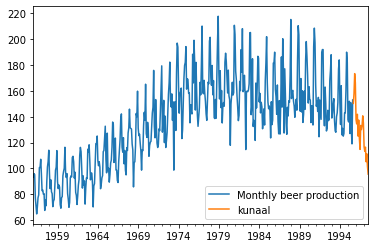

In [50]:
dfg['kunaal']=result.predict(start=476,end=499)
dfg[['Monthly beer production','kunaal']].plot()

In [51]:
dfg

,Monthly beer production,Monthly beer production 1st diff,Monthly beer production 1st seasonal diff,self,kunaal
1956-01-01,93.2,NaN,NaN,NaN,NaN
1956-02-01,96.0,2.8,NaN,NaN,NaN
1956-03-01,95.2,-0.8,NaN,NaN,NaN
1956-04-01,77.1,-18.1,NaN,NaN,NaN
1956-05-01,70.9,-6.2,NaN,NaN,NaN
...,...,...,...,...,...
1997-03-01,NaN,NaN,NaN,NaN,116.484179
1997-04-01,NaN,NaN,NaN,NaN,105.184654
1997-05-01,NaN,NaN,NaN,NaN,111.362933
1997-06-01,NaN,NaN,NaN,NaN,101.667637
